<a href="https://colab.research.google.com/github/madhumitha-r26/DL_Learnings/blob/main/YOLO_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
%pip install opencv-python

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [22]:
image=cv2.imread("./hero_girl.jpg")

In [23]:
type(image)

numpy.ndarray

In [24]:
image.shape  #width, heigth, no.of.channels

(768, 1376, 3)

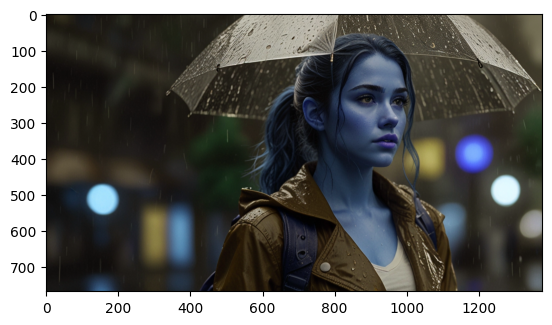

In [25]:
plt.imshow(image)

In [27]:
new_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

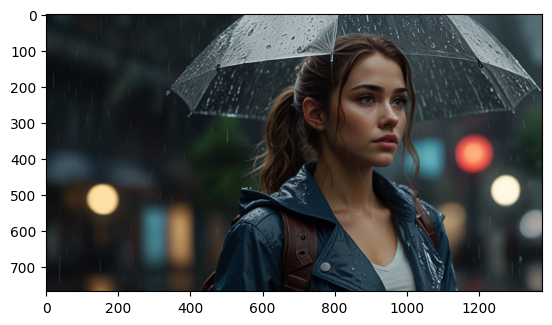

In [28]:
plt.imshow(new_image)

cv2 generates an inverted image

1. splitting image channel:

In [29]:
r,g,b=cv2.split(new_image)
print(r)
print(g)
print(b)

[[15 14 13 ... 85 84 85]
 [15 14 14 ... 85 85 85]
 [14 14 15 ... 85 85 86]
 ...
 [21 22 21 ... 86 85 85]
 [22 22 22 ... 80 81 84]
 [22 21 23 ... 77 79 80]]
[[ 24  23  22 ... 110 109 110]
 [ 24  23  23 ... 110 110 110]
 [ 23  23  22 ... 110 108 109]
 ...
 [ 23  24  23 ...  88  87  87]
 [ 24  24  23 ...  85  83  86]
 [ 24  23  24 ...  82  81  82]]
[[ 29  28  27 ... 115 114 115]
 [ 29  28  28 ... 115 115 115]
 [ 28  28  28 ... 115 114 115]
 ...
 [ 22  23  22 ...  83  82  82]
 [ 23  23  25 ...  79  80  83]
 [ 23  22  26 ...  76  78  79]]


In [30]:
print("r:",r.shape)
print("g:",g.shape)
print("b:",b.shape)

r: (768, 1376)
g: (768, 1376)
b: (768, 1376)


2. merge image:

In [32]:
new_image=cv2.merge((r,g,b))
print(new_image)

[[[ 15  24  29]
  [ 14  23  28]
  [ 13  22  27]
  ...
  [ 85 110 115]
  [ 84 109 114]
  [ 85 110 115]]

 [[ 15  24  29]
  [ 14  23  28]
  [ 14  23  28]
  ...
  [ 85 110 115]
  [ 85 110 115]
  [ 85 110 115]]

 [[ 14  23  28]
  [ 14  23  28]
  [ 15  22  28]
  ...
  [ 85 110 115]
  [ 85 108 114]
  [ 86 109 115]]

 ...

 [[ 21  23  22]
  [ 22  24  23]
  [ 21  23  22]
  ...
  [ 86  88  83]
  [ 85  87  82]
  [ 85  87  82]]

 [[ 22  24  23]
  [ 22  24  23]
  [ 22  23  25]
  ...
  [ 80  85  79]
  [ 81  83  80]
  [ 84  86  83]]

 [[ 22  24  23]
  [ 21  23  22]
  [ 23  24  26]
  ...
  [ 77  82  76]
  [ 79  81  78]
  [ 80  82  79]]]


3. resize image

In [35]:
s=10
w=int(new_image.shape[1]*s/100) #width
h=int(new_image.shape[0]*s/100) #height
dim=(w,h)
resize=cv2.resize(image,dim,interpolation=cv2.INTER_AREA)

In [36]:
print(resize.shape)

(76, 137, 3)


4. rotate image

In [39]:
(h,w)=new_image.shape[:2]
c=(w/2,h/2)
angle=90
m=cv2.getRotationMatrix2D(c,angle,1.0)
rotate_90=cv2.warpAffine(new_image,m,(w,h)) #rotated counter clock wise

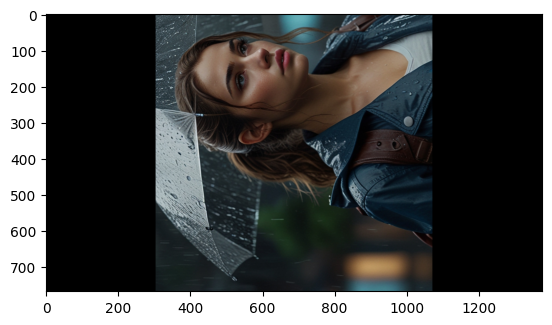

In [40]:
plt.imshow(rotate_90)